## Annotation Quality

In [ ]:
# ! pip install pyspellchecker
from spellchecker import SpellChecker
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from pathlib import Path
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity


# NOTE: put MLPC2025_dataset beside script
BASE_DIR = Path(os.getcwd()) / 'MLPC2025_dataset'

# global annotation text embeddings (aligns 1:1 with annotations.csv rows)
annotations_embeddings = np.load(BASE_DIR / "annotations_text_embeddings.npz")["embeddings"]

annotations_df = pd.read_csv(BASE_DIR / 'annotations.csv')
meta_df = pd.read_csv(BASE_DIR / 'metadata.csv')

# inner join meta on filename
df = annotations_df.join(meta_df.set_index('filename'), on='filename', rsuffix='_meta')

df['word_count'] = df['text'].astype(str).str.split().apply(len)
df['duration'] = df['offset'] - df['onset']
df['text_length'] = df['text'].astype(str).str.strip().apply(len)

print('Annotation shape:', annotations_df.shape)
print('Meta shape:', meta_df.shape)
print('Joint df shape:', df.shape)

view = df.copy().sort_values('filename')
view

Annotation shape: (35826, 7)
Meta shape: (9026, 12)
Joint df shape: (35826, 21)


,task_id,filename,annotator,text,onset,offset,filename_unsafe,keywords,freesound_id,sound_link,...,license,title,description,num_downloads,geotag,start_time_s,end_time_s,word_count,duration,text_length
378,161988521,100300.mp3,1123502575089333498751581122490112644453228212...,A group of people singh and several musical in...,0.102129,26.471927,100300_01882 solmization 2wav.mp3,"choir, do, fa, mi, mixed, practice, practise, ...",100300,https://freesound.org/people/Robinhood76/sound...,...,https://creativecommons.org/licenses/by-nc/4.0/,01882 solmization 2.wav,Mixed choir practising before recording - solm...,254,NaN,0.0,26.472,13,26.369798,80
5312,161980786,100389.mp3,8873556092572298148519701145098139698815384608...,Constant loud creek murmur.,0.000000,19.281905,100389_20100627creekfrogsbirdswav.mp3,"babling, brook, creek, cycadas, field-recordin...",100389,https://freesound.org/people/dobroide/sounds/1...,...,https://creativecommons.org/licenses/by/4.0/,20100627.creek.frogs.birds.wav,babling of a small creek with croaking frog an...,90,37.5449005738 -6.32229924202,157.0,176.282,4,19.281905,27
19633,161980786,100389.mp3,8873556092572298148519701145098139698815384608...,Short high-pitch bird chirp outdoors.,0.988371,1.387187,100389_20100627creekfrogsbirdswav.mp3,"babling, brook, creek, cycadas, field-recordin...",100389,https://freesound.org/people/dobroide/sounds/1...,...,https://creativecommons.org/licenses/by/4.0/,20100627.creek.frogs.birds.wav,babling of a small creek with croaking frog an...,90,37.5449005738 -6.32229924202,157.0,176.282,5,0.398816,37
21366,161980786,100389.mp3,8873556092572298148519701145098139698815384608...,Short high-pitch bird chirp outdoors.,3.467968,3.832105,100389_20100627creekfrogsbirdswav.mp3,"babling, brook, creek, cycadas, field-recordin...",100389,https://freesound.org/people/dobroide/sounds/1...,...,https://creativecommons.org/licenses/by/4.0/,20100627.creek.frogs.birds.wav,babling of a small creek with croaking frog an...,90,37.5449005738 -6.32229924202,157.0,176.282,5,0.364137,37
21736,161980786,100389.mp3,8873556092572298148519701145098139698815384608...,Short high-pitch bird chirp outdoors.,9.588933,9.970409,100389_20100627creekfrogsbirdswav.mp3,"babling, brook, creek, cycadas, field-recordin...",100389,https://freesound.org/people/dobroide/sounds/1...,...,https://creativecommons.org/licenses/by/4.0/,20100627.creek.frogs.birds.wav,babling of a small creek with croaking frog an...,90,37.5449005738 -6.32229924202,157.0,176.282,5,0.381477,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35615,161981641,99085.mp3,3240443509830288922381582293197598005414662654...,Thunder sound slowly vanishing,0.983358,18.983083,99085_20100614thunder6wav.mp3,"field-recording, lightning, storm, thunder, th...",99085,https://freesound.org/people/csengeri/sounds/9...,...,https://creativecommons.org/licenses/by/4.0/,20100614thunder6.wav,This thunder was recorded by my MP3 player in ...,106,NaN,0.0,22.446,4,17.999725,30
16828,161990654,9921.mp3,6422529752829023869771283792587839721386387100...,a car is driving out,19.163506,26.004150,9921_bus_leavesaif.mp3,"bus, diesel, engine, field-recording, traffic",9921,https://freesound.org/people/Heigh-hoo/sounds/...,...,http://creativecommons.org/publicdomain/zero/1.0/,bus_leaves.aif,A bus leaves bus-stop. You can hear typical so...,1685,35.0245844296 135.775651932,0.0,26.004,5,6.840644,20
13896,161990654,9921.mp3,6422529752829023869771283792587839721386387100...,a diesel engine is working,0.000000,19.114991,9921_bus_leavesaif.mp3,"bus, diesel, engine, field-recording, traffic",9921,https://freesound.org/people/Heigh-hoo/sounds/...,...,http://creativecommons.org/publicdomain/zero/1.0/,bus_leaves.aif,A bus leaves bus-stop. You can hear typical so...,1685,35.0245844296 135.775651932,0.0,26.004,5,19.114991,26
5074,161983570,99436.mp3,2876562271304061928125702383219331649337564952...,Person walking on ground.,0.037116,17.954712,99436_018

### Multiple Annontators

In [3]:
# filesnames w multiple different annotators
mult_ann_list = (
    df.groupby('filename')['annotator'].nunique().reset_index().query('annotator > 1')['filename']).to_list()

print('Files with multiple annotators:', len(mult_ann_list))
print(mult_ann_list)
assert '100300.mp3' not in mult_ann_list
assert '100489.mp3' not in mult_ann_list
assert '102431.mp3' in mult_ann_list

Files with multiple annotators: 731
['102431.mp3', '102744.mp3', '106035.mp3', '106969.mp3', '106979.mp3', '108514.mp3', '110921.mp3', '111059.mp3', '113327.mp3', '113355.mp3', '113356.mp3', '114286.mp3', '116791.mp3', '117611.mp3', '118341.mp3', '118728.mp3', '119173.mp3', '120106.mp3', '121364.mp3', '121532.mp3', '122956.mp3', '122978.mp3', '124674.mp3', '125559.mp3', '125652.mp3', '127345.mp3', '127606.mp3', '130473.mp3', '132076.mp3', '134783.mp3', '136599.mp3', '136978.mp3', '138014.mp3', '139092.mp3', '139958.mp3', '140581.mp3', '141704.mp3', '143645.mp3', '143964.mp3', '144473.mp3', '146436.mp3', '147349.mp3', '148788.mp3', '151005.mp3', '151279.mp3', '154783.mp3', '157205.mp3', '158518.mp3', '159328.mp3', '159437.mp3', '159747.mp3', '160158.mp3', '16043.mp3', '160769.mp3', '161883.mp3', '161893.mp3', '161896.mp3', '165096.mp3', '165265.mp3', '166260.mp3', '166415.mp3', '166643.mp3', '168078.mp3', '168079.mp3', '169236.mp3', '170316.mp3', '17056.mp3', '17112.mp3', '171981.mp3', 

In [45]:
# entire dataset
anns_per_anner = df.groupby('annotator')['filename'].nunique().reset_index()
display(anns_per_anner)
display(anns_per_anner.agg({'filename': ['count', 'sum', 'mean', 'std', 'min', 'max']}))

print()

# filtered for filenames with multiple annotators
anns_per_anner = df[df['filename'].isin(mult_ann_list)].groupby('annotator')['filename'].nunique().reset_index()
display(anns_per_anner)
display(anns_per_anner.agg({'filename': ['count', 'sum', 'mean', 'std', 'min', 'max']}))

,annotator,filename
0,1000854762852742563558281041488243758990786435...,30
1,1000891838091676244123198860162673450260422534...,36
2,1002449017426261919289383963619665685688171629...,30
3,1002470296038581924469370812946971636177507332...,29
4,1003332365233238736357014917764374520125117349...,33
...,...,...
325,9740814023062890390710910930184937584941402678...,30
326,9815655844810626804359568722886255701756207496...,29
327,9848073938367086273223501544613844995177810507...,31
328,9926261255232587829824466818155673109129531646...,33


,filename
count,330.000000
sum,9763.000000
mean,29.584848
std,4.251988
min,1.000000
max,44.000000


,annotator,filename
0,1000854762852742563558281041488243758990786435...,3
1,1000891838091676244123198860162673450260422534...,5
2,1002449017426261919289383963619665685688171629...,3
3,1002470296038581924469370812946971636177507332...,5
4,1003332365233238736357014917764374520125117349...,4
...,...,...
317,9740814023062890390710910930184937584941402678...,5
318,9815655844810626804359568722886255701756207496...,5
319,9848073938367086273223501544613844995177810507...,4
320,9926261255232587829824466818155673109129531646...,4


,filename
count,322.000000
sum,1468.000000
mean,4.559006
std,2.588844
min,1.000000
max,27.000000


In [4]:
def get_stats_df(**kwargs) -> pd.DataFrame:
    d = {}

    for name, arr in kwargs.items():
        v = np.array(arr)
        d[name] = {
            "count": len(v),
            "mean": v.mean() if len(v) else np.nan,
            "median": np.median(v) if len(v) else np.nan,
            "std": v.std() if len(v) else np.nan,
            "min": np.percentile(v, 0) if len(v) else np.nan,
            "q1": np.percentile(v, 25) if len(v) else np.nan,
            "q2": np.percentile(v, 50) if len(v) else np.nan,
            "q3": np.percentile(v, 75) if len(v) else np.nan,
            "max": np.percentile(v, 100) if len(v) else np.nan,
        }

    return pd.DataFrame(d)

### 1.(a) How precise are the temporal annotations?

In [ ]:
onset_diffs = []
offset_diffs = []
mean_diffs = []
euclidean_ds = []

for filename in mult_ann_list:
    filename_filtered_df = df[df["filename"] == filename]

    for i, row1 in filename_filtered_df.iterrows():
        for j, row2 in filename_filtered_df.iterrows():
            # skip same pairs and reverse duplicates
            if i >= j:
                continue 
            # skip same-annotator pairs
            if row1['annotator'] == row2['annotator']:
                continue  
            
            # temporal overlap
            latest_start = max(row1['onset'], row2['onset'])
            earliest_end = min(row1['offset'], row2['offset'])
            if latest_start < earliest_end:
                # euclidean distance
                vec1 = np.array([row1['onset'], row1['offset']])
                vec2 = np.array([row2['onset'], row2['offset']])   
                euclidean_d = norm(vec1 - vec2)  
                euclidean_ds.append(euclidean_d)

                # other
                onset_diff = abs(row1['onset'] - row2['onset'])
                offset_diff = abs(row1['offset'] - row2['offset'])
                mean_diff = (onset_diff + offset_diff) / 2
                onset_diffs.append(onset_diff)
                offset_diffs.append(offset_diff)
                mean_diffs.append(mean_diff)

,euclidean_ds,onset_diffs,offset_diffs,mean_diffs
count,5602.000000,5602.000000,5602.000000,5602.000000
mean,9.771971,5.533869,6.022803,5.778336
median,10.131216,2.584162,2.837816,5.993680
std,8.099633,6.647964,7.071223,4.741829
min,0.000000,0.000000,0.000000,0.000000
q1,1.052417,0.087185,0.101542,0.587698
q2,10.131216,2.584162,2.837816,5.993680
q3,16.688848,9.513424,10.795400,9.979455
max,29.438327,29.438255,28.366070,14.751858


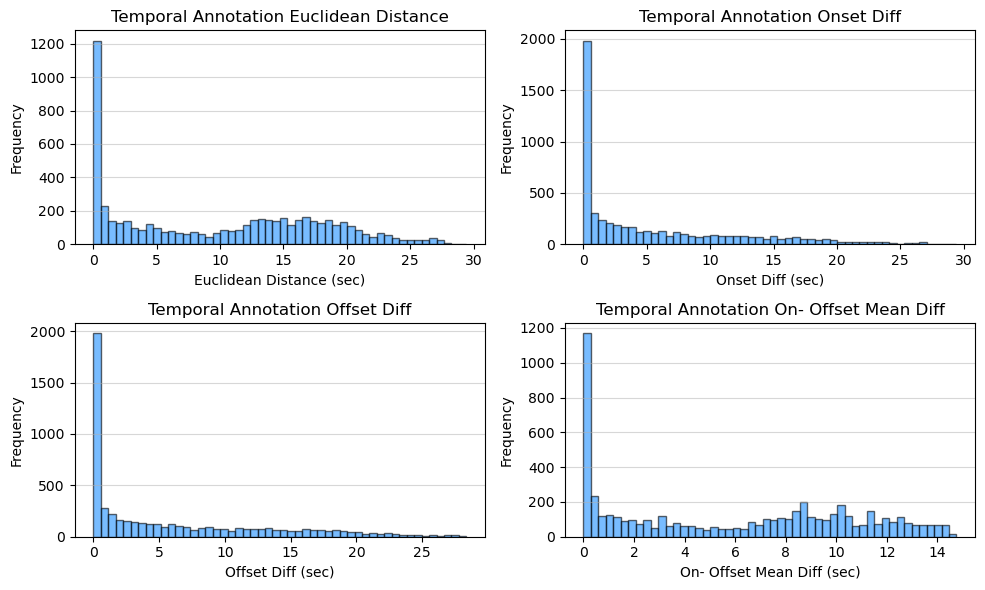

In [ ]:
display(get_stats_df(
    euclidean_ds=euclidean_ds,
    onset_diffs=onset_diffs,
    offset_diffs=offset_diffs,
    mean_diffs=mean_diffs
))

metrics = {
    'Euclidean Distance': euclidean_ds,
    'Onset Diff': onset_diffs,
    'Offset Diff': offset_diffs,
    'On- Offset Mean Diff': mean_diffs
}
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()

for ax, (title, data) in zip(ax, metrics.items()):
    ax.hist(data, bins=50, color='dodgerblue', alpha=0.6, edgecolor='black')
    ax.set_title(f'Temporal Annotation {title}')
    ax.set_xlabel(f'{title} (sec)')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

### 1.(b) How similar are the text annotations that correspond to the same region?

In [ ]:
df = df.reset_index(drop=True)
text_sim = []

for filename in mult_ann_list:
    file_df = df[df['filename'] == filename].reset_index(drop=True)
    
    for i, row1 in file_df.iterrows():
        for j, row2 in file_df.iterrows():
            # skip same row and reverse dupes
            if i >= j:  
                continue
            # ensure different annotators
            if row1['annotator'] == row2['annotator']:
                continue

            # temporal overlap
            latest_start = max(row1['onset'], row2['onset'])
            earliest_end = min(row1['offset'], row2['offset'])
            if latest_start < earliest_end:
                # cosine similarity
                idx1 = row1.name
                idx2 = row2.name
                emb1 = annotations_embeddings[idx1].reshape(1, -1)
                emb2 = annotations_embeddings[idx2].reshape(1, -1)
                sim = cosine_similarity(emb1, emb2)[0][0]
                if not np.isnan(sim):
                    text_sim.append(sim)

,text_cos_sim
count,5602.000000
mean,0.088151
median,0.072244
std,0.147222
min,-0.291942
q1,-0.004552
q2,0.072244
q3,0.178974
max,0.747890


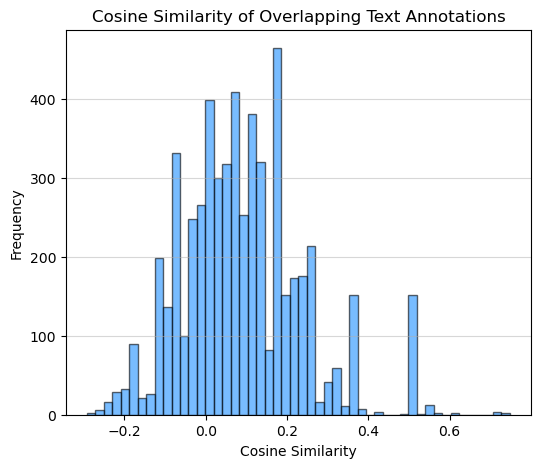

In [ ]:
display(get_stats_df(text_cos_sim=text_sim))

plt.figure(figsize=(6, 5))
plt.hist(text_sim, bins=50, color='dodgerblue', alpha=.6, edgecolor='black')
plt.title('Cosine Similarity of Overlapping Text Annotations')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

exact_matches = np.sum(np.array(text_sim) >= 0.95)

Most overlapping annotations from different annotators show low textual similarity, with a mean cosine similarity of 0.088 and a median of 0.072. The similarity values range from –0.29 to 0.75, indicating that while some annotations describe the same sound events similarly, many differ significantly in wording or focus. The histogram confirms this by showing a concentration of values between 0 and 0.2, suggesting generally weak agreement in textual descriptions even when annotators mark the same time span. This variation is expected due to the open-text nature of the task and individual interpretation differences.

### 2.(a).1 How many annotations did we collect per file? How many distinct sound events per file?

Total unique files: 9026
Total annotations: 35826
Mean annotations per file: 3.9692
Median annotations per file: 2.0
Std annotations per file: 4.4254
Min annotations per file: 1
Q1 annotations per file: 1.0
Q2 annotations per file: 2.0
Q3 annotations per file: 5.0
Max annotations per file: 96


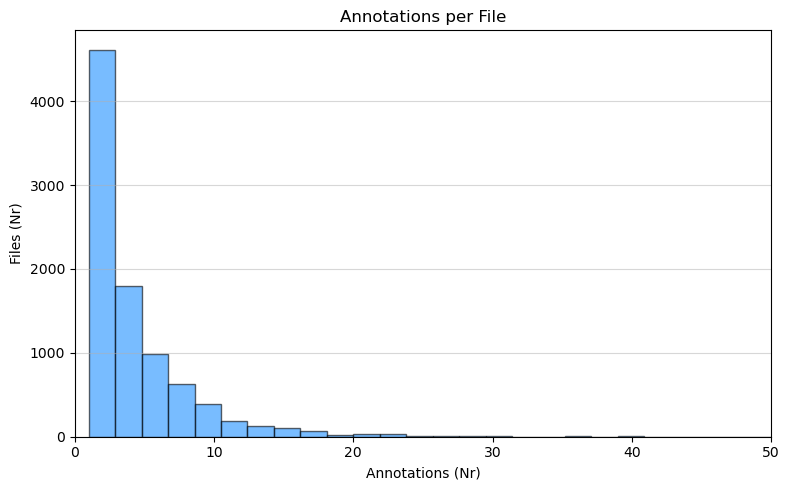

In [11]:
# annotations per file
file_counts = df["filename"].value_counts()

print("Total unique files:", file_counts.size)
print("Total annotations:", df.shape[0])
print("Mean annotations per file:", round(file_counts.mean(), 4))
print("Median annotations per file:", file_counts.median())
print("Std annotations per file:", round(file_counts.std(), 4))
print("Min annotations per file:", file_counts.min())
print("Q1 annotations per file:", file_counts.quantile(0.25))
print("Q2 annotations per file:", file_counts.quantile(0.5))
print("Q3 annotations per file:", file_counts.quantile(0.75))
print("Max annotations per file:", file_counts.max())

plt.figure(figsize=(8, 5))
plt.hist(file_counts, bins=50, color='dodgerblue', alpha=.6, edgecolor='black')
plt.title("Annotations per File")
plt.xlabel("Annotations (Nr)")
plt.ylabel("Files (Nr)")
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.xlim(0, 50)
plt.show()

In [13]:
df[df['filename'] == '623187.mp3']

,task_id,filename,annotator,text,onset,offset,filename_unsafe,keywords,freesound_id,sound_link,...,license,title,description,num_downloads,geotag,start_time_s,end_time_s,word_count,duration,text_length
88,161987365,623187.mp3,7730311164966960713783008629945271263745821651...,A kick drum sound.,13.112594,13.317479,623187_Web Crawler Full Mix.mp3,"drum, bass, dnb, song, cc0, kit, construction,...",623187,https://freesound.org/people/deadrobotmusic/so...,...,http://creativecommons.org/publicdomain/zero/1.0/,Web Crawler Full Mix,Web Crawler Full Mix //cc0,58,NaN,8.4,33.208,4,0.204884,18
209,161987365,623187.mp3,7730311164966960713783008629945271263745821651...,An electronic snare sound.,5.002591,5.139181,623187_Web Crawler Full Mix.mp3,"drum, bass, dnb, song, cc0, kit, construction,...",623187,https://freesound.org/people/deadrobotmusic/so...,...,http://creativecommons.org/publicdomain/zero/1.0/,Web Crawler Full Mix,Web Crawler Full Mix //cc0,58,NaN,8.4,33.208,4,0.136590,26
235,161987365,623187.mp3,7730311164966960713783008629945271263745821651...,An electronic snare sound.,9.834446,9.971035,623187_Web Crawler Full Mix.mp3,"drum, bass, dnb, song, cc0, kit, construction,...",623187,https://freesound.org/people/deadrobotmusic/so...,...,http://creativecommons.org/publicdomain/zero/1.0/,Web Crawler Full Mix,Web Crawler Full Mix //cc0,58,NaN,8.4,33.208,4,0.136590,26
550,161987365,623187.mp3,7730311164966960713783008629945271263745821651...,A dubstep growl sound.,3.995244,4.319644,623187_Web Crawler Full Mix.mp3,"drum, bass, dnb, song, cc0, kit, construction,...",623187,https://freesound.org/people/deadrobotmusic/so...,...,http://creativecommons.org/publicdomain/zero/1.0/,Web Crawler Full Mix,Web Crawler Full Mix //cc0,58,NaN,8.4,33.208,4,0.324400,22
608,161987365,623187.mp3,7730311164966960713783008629945271263745821651...,An electronic snare sound.,5.702613,5.839202,623187_Web Crawler Full Mix.mp3,"drum, bass, dnb, song, cc0, kit, construction,...",623187,https://freesound.org/people/deadrobotmusic/so...,...,http://creativecommons.org/publicdomain/zero/1.0/,Web Crawler Full Mix,Web Crawler Full Mix //cc0,58,NaN,8.4,33.208,4,0.136590,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33628,161987365,623187.mp3,7730311164966960713783008629945271263745821651...,An electronic snare sound.,7.768529,7.905119,623187_Web Crawler Full Mix.mp3,"drum, bass, dnb, song, cc0, kit, construction,...",623187,https://freesound.org/people/deadrobotmusic/so...,...,http://creativecommons.org/publicdomain/zero/1.0/,Web Crawler Full Mix,Web Crawler Full Mix //cc0,58,NaN,8.4,33.208,4,0.136590,26
33678,161987365,623187.mp3,7730311164966960713783008629945271263745821651...,A dubstep growl sound.,17.773712,18.115186,623187_Web Crawler Full Mix.mp3,"drum, bass, dnb, song, cc0, kit, construction,...",623187,https://freesound.org/people/deadrobotmusic/so...,...,http://creativecommons.org/publicdomain/zero/1.0/,Web Crawler Full Mix,Web Crawler Full Mix //cc0,58,NaN,8.4,33.208,4,0.341474,22
34290,161987365,623187.mp3,7730311164966960713783008629945271263745821651...,An electronic snare sound.,2.953748,3.090338,623187_Web Crawler Full Mix.mp3,"drum, bass, dnb, song, cc0, kit, construction,...",623187,https://freesound.org/people/deadrobotmusic/so...,...,http://creativecommons.org/publicdomain/zero/1.0/,Web Crawler Full Mix,Web Crawler Full Mix //cc0,58,NaN,8.4,33.208,4,0.136590,26
34375,161987365,623187.mp3,7730311164966960713783008629945271263745821651...,A kick drum sound.,18.627397,18.832281,623187_Web Crawler Full Mix.mp3,"drum, bass, dnb, song, cc0, kit, construction,...",623187,https://freesound.org/people/deadrobotmusic/so...,...,http://creativecommons.org/publicdomain/zero/1.0/,Web Crawler Full Mix,Web Crawler Full Mix //cc0,58,NaN,8.4,33.208,4,0.204884,18


In [14]:
df = df.reset_index(drop=True)
distinct_event_counts = []

for filename, group in df.groupby("filename"):
    # single annotations are distinct events
    if len(group) < 2:
        distinct_event_counts.append(1)
        continue

    indices = group.index.tolist()
    group_embeddings = annotations_embeddings[indices]
    sim_matrix = cosine_similarity(group_embeddings)

    # greedy clustering by sim threshold
    threshold = 0.8
    visited = set()
    clusters = []

    for i in range(len(sim_matrix)):
        if i in visited:
            continue
        cluster = {i}
        for j in range(i + 1, len(sim_matrix)):
            if sim_matrix[i, j] >= threshold:
                cluster.add(j)
        visited.update(cluster)
        clusters.append(cluster)

    # clusters counted as distinct events
    distinct_event_counts.append(len(clusters))

Total unique files: 9026
Mean distinct events per file: 2.4253
Median distinct events per file: 2.0
Std: 1.9063
Min: 1
Q1: 1.0
Q2: 2.0
Q3: 3.0
Max: 27


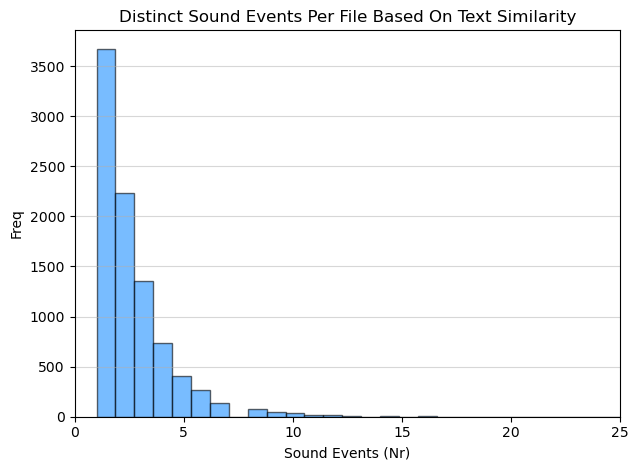

In [15]:
distinct_event_counts = np.array(distinct_event_counts)
print("Total unique files:", len(distinct_event_counts))
print("Mean distinct events per file:", round(distinct_event_counts.mean(), 4))
print("Median distinct events per file:", np.median(distinct_event_counts))
print("Std:", round(distinct_event_counts.std(), 4))
print("Min:", distinct_event_counts.min())
print("Q1:", np.quantile(distinct_event_counts, 0.25))
print("Q2:", np.quantile(distinct_event_counts, 0.5))
print("Q3:", np.quantile(distinct_event_counts, 0.75))
print("Max:", distinct_event_counts.max())

plt.hist(distinct_event_counts, color='dodgerblue', alpha=.6, bins=30, edgecolor='black')
plt.title("Distinct Sound Events Per File Based On Text Similarity")
plt.xlabel("Sound Events (Nr)")
plt.ylabel("Freq")
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.xlim(0, 25)
plt.show()

### 2.(b).1 How detailed are the text annotations?

Total annotations: 35826
Mean word count: 7.4874
Median: 7.0
Std: 4.6315
Min: 1
Q1: 4.0
Q2: 7.0
Q3: 9.0
Max: 88


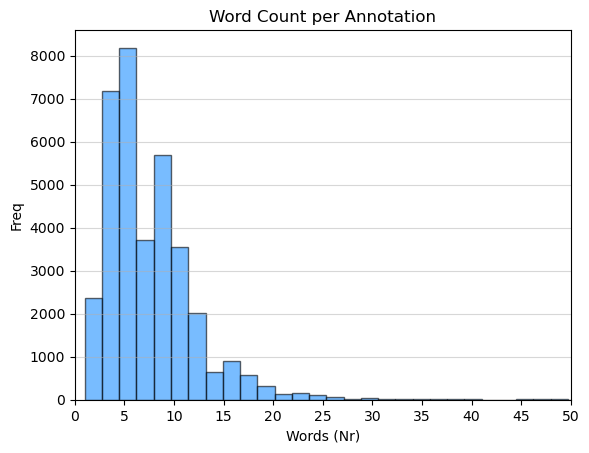

In [16]:
word_counts = df['word_count']
print('Total annotations:', len(word_counts))
print('Mean word count:', round(word_counts.mean(), 4))
print('Median:', word_counts.median())
print('Std:', round(word_counts.std(), 4))
print('Min:', word_counts.min())
print('Q1:', word_counts.quantile(0.25))
print('Q2:', word_counts.quantile(0.5))
print('Q3:', word_counts.quantile(0.75))
print('Max:', word_counts.max())

plt.hist(df['word_count'], color='dodgerblue', alpha=0.6, bins=50, edgecolor='black')
plt.title('Word Count per Annotation')
plt.xlabel('Words (Nr)')
plt.ylabel('Freq')
plt.grid(axis='y', alpha=0.5)
plt.xticks(ticks=range(0, 51, 5))
plt.xlim(0, 50)
plt.show()


### 2.(b).2 How much does the quality of annotations vary between different annotators?

,count,mean,median,min,max
count,330.000000,330.000000,330.000000,330.000000,330.000000
mean,108.563636,7.853873,7.431818,2.787879,18.366667
std,49.415956,3.540323,3.626237,1.642105,9.177519
min,2.000000,1.372549,1.000000,1.000000,3.000000
25%,75.000000,5.560290,5.000000,2.000000,13.000000
50%,100.500000,7.189286,7.000000,2.000000,16.000000
75%,136.000000,9.131389,9.000000,3.000000,22.000000
max,376.000000,27.516129,27.000000,16.000000,88.000000


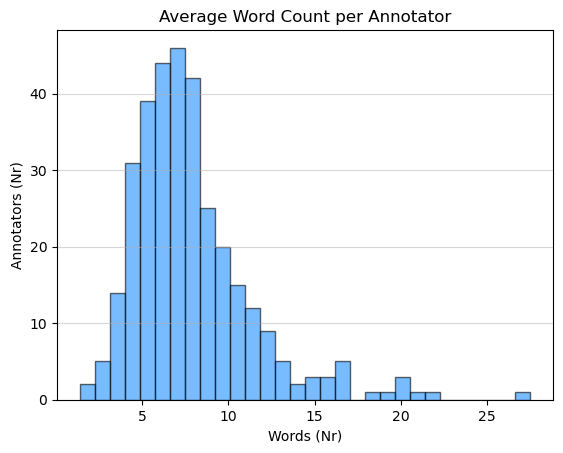

In [17]:
# avg word count per annotator
word_stats = df.groupby('annotator')['word_count'].agg(['count', 'mean', 'median', 'min', 'max'])
display(word_stats.describe())

plt.hist(word_stats['mean'], color='dodgerblue', alpha=0.6, bins=30, edgecolor='black')
plt.title('Average Word Count per Annotator')
plt.xlabel('Words (Nr)')
plt.ylabel('Annotators (Nr)')
plt.grid(axis='y', alpha=0.5)
plt.show()

Most annotators wrote relatively short descriptions, with an average word count of around 7.85 words per annotation. The histogram shows a clear concentration between 5 and 10 words, but some annotators averaged over 20 words, showing high variability.

The describe() table confirms this:

The mean ranges from about 1.4 to 27.5, with a standard deviation of 3.54

This suggests that while most annotators were consistent and concise, a few were significantly more detailed

The variation across annotators shows differences in how people interpreted the task or how much effort they put into descriptions

This supports the idea that annotation quality does vary noticeably between annotators in terms of how descriptive they are.

,count,mean,median,min,max
count,330.000000,330.000000,330.000000,330.000000,330.000000
mean,108.563636,8.383155,5.013454,0.394947,29.000232
std,49.415956,3.314957,4.749339,0.805539,1.904189
min,2.000000,2.262850,0.517491,0.000000,8.059828
25%,75.000000,6.020112,1.986901,0.146358,28.954192
50%,100.500000,7.697020,3.129294,0.223971,29.447486
75%,136.000000,10.246002,5.973118,0.421723,29.753632
max,376.000000,23.118302,23.603519,9.695720,30.044718


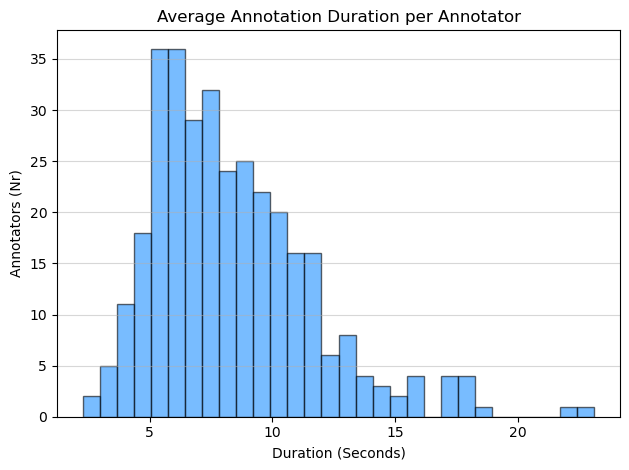

In [18]:
# duration stats per annotator
duration_stats = df.groupby('annotator')['duration'].agg(['count', 'mean', 'median', 'min', 'max'])
display(duration_stats.describe())

plt.hist(duration_stats['mean'], color='dodgerblue', alpha=0.6, bins=30, edgecolor='black')
plt.title('Average Annotation Duration per Annotator')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Annotators (Nr)')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

The average duration of annotations varies noticeably between annotators. Most annotators marked events around 6 to 10 seconds long, with the overall average being 8.38 seconds. However, the histogram shows a long tail — some annotators consistently marked very short clips (as low as 2–3 seconds), while others marked much longer events, up to 23 seconds on average.

The summary table backs this up:

Duration means range from 2.26 to 23.12 seconds

The standard deviation is 3.31, showing a moderate spread in behavior

This variation suggests that annotators interpreted the concept of an "event" differently — some more narrowly, others more broadly

In short, temporal annotation quality and consistency clearly varies across annotators.

### 2.(c) Are there any obvious inconsistencies, outliers, or poor-quality annotations in the data? Propose a simple method to filter or fix incorrect or poor-quality annotations (e.g., remove outliers, typos, or spelling errors).


In [66]:
# detect very short or long annotations
def review_outliers(lower_thresh, upper_thresh) -> None:
    too_short = df[df['duration'] < lower_thresh].shape[0]
    too_long = df[df['duration'] > upper_thresh].shape[0]

    print('Lower threshold:', lower_thresh)
    print('Upper threshold:', upper_thresh)
    print(f'Too short ({lower_thresh} s): {too_short} / {df.shape[0]} ({too_short/df.shape[0]*100:.4f}%)')
    print(f'Too long ({upper_thresh} s): {too_long} / {df.shape[0]} ({too_long/df.shape[0]*100:.4f}%)')


print('Outliers by IQR')
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
iqr = q3 - q1
lower_thresh = q1 - 1.5 * iqr
upper_thresh = q3 + 1.5 * iqr
review_outliers(lower_thresh, upper_thresh)

print('\nOutliers by 99%')
low_thresh = df['duration'].quantile(0.01)
high_thresh = df['duration'].quantile(0.99)
review_outliers(low_thresh, high_thresh)

print('\nOutliers by 95%')
low_thresh = df['duration'].quantile(0.05)
high_thresh = df['duration'].quantile(0.95)
review_outliers(low_thresh, high_thresh)


Outliers by IQR
Lower threshold: -16.513847258382945
Upper threshold: 30.113016679704273
Too short (-16.513847258382945 s): 0 / 35826 (0.0000%)
Too long (30.113016679704273 s): 0 / 35826 (0.0000%)

Outliers by 99%
Lower threshold: 0.13230785623251684
Upper threshold: 29.263506217056356
Too short (0.13230785623251684 s): 355 / 35826 (0.9909%)
Too long (29.263506217056356 s): 359 / 35826 (1.0021%)

Outliers by 95%
Lower threshold: 0.2720538342428285
Upper threshold: 26.130563114224188
Too short (0.2720538342428285 s): 1792 / 35826 (5.0020%)
Too long (26.130563114224188 s): 1792 / 35826 (5.0020%)


In [60]:
display(df['duration'].agg(['count', 'mean', 'std', 'min', 'median', 'max']).to_frame().T.assign(
    p01=df['duration'].quantile(0.01),
    p05=df['duration'].quantile(0.05),
    Q1=df['duration'].quantile(0.25),
    Q3=df['duration'].quantile(0.75),
    p95=df['duration'].quantile(0.95),
    p99=df['duration'].quantile(0.99),
    IQR=df['duration'].quantile(0.75) - df['duration'].quantile(0.25),
    IQR_lower=df['duration'].quantile(0.25) - 1.5 * (df['duration'].quantile(0.75) - df['duration'].quantile(0.25)),
    IQR_upper=df['duration'].quantile(0.75) + 1.5 * (df['duration'].quantile(0.75) - df['duration'].quantile(0.25)),
).T)



,duration
count,35826.000000
mean,7.313916
std,8.761079
min,0.000000
median,2.660962
max,30.044718
p01,0.132308
p05,0.272054
Q1,0.971227
Q3,12.627943


The IQR method didn’t detect any outliers, meaning the central range is wide and tolerant.

The 1%–99% percentile method flagged about 1% of annotations as too short or too long, suggesting a small number of extreme cases.

The 5%–95% percentile method flagged about 5% on each side, identifying a broader range of potentially low-quality annotations.

This shows that while most annotations are reasonable, there are a few consistent outliers — especially at the extremes of duration.

In [65]:
# short or empty text len
for i in range(4):
    subset = df[df['word_count'] == i]
    print(f'{i} word(s) annotations:', subset.shape[0])

# iqr outlier
q1 = df['word_count'].quantile(0.25)
q3 = df['word_count'].quantile(0.75)
iqr = q3 - q1
lower_thresh = q1 - 1.5 * iqr
upper_thresh = q3 + 1.5 * iqr
iqr_outliers = df[df['word_count'] < lower_thresh]

# percentile
p01_thresh = df['word_count'].quantile(0.01)
p05_thresh = df['word_count'].quantile(0.05)
p01_count = df[df['word_count'] < p01_thresh].shape[0]
p05_count = df[df['word_count'] < p05_thresh].shape[0]

# explicit: 5
too_short_text = df[df['word_count'] < 5]

print(f'\nLower outlier threshold: {lower_thresh} words')
print(f'One percentile threshold: {df['word_count'].quantile(0.01)} words')
print(f'IQR: {iqr} words')
print(f'Q1 threshold: {q1} words')
print(f'\nToo short text (< 5 words): {too_short_text.shape[0]} / {df.shape[0]} ({too_short_text.shape[0]/df.shape[0]*100:.4f}%)')
print(f'Lower outliers by bottom IQR: {iqr_outliers.shape[0]} / {df.shape[0]} ({iqr_outliers.shape[0]/df.shape[0]*100:.4f}%)')
print(f'Lower outliers by 1% threshold (< {p01_thresh:.2f} words): {p01_count} / {df.shape[0]} ({p01_count/df.shape[0]*100:.4f}%)')
print(f'Lower outliers by 5% threshold (< {p05_thresh:.2f} words): {p05_count} / {df.shape[0]} ({p05_count/df.shape[0]*100:.4f}%)')

0 word(s) annotations: 0
1 word(s) annotations: 335
2 word(s) annotations: 2024
3 word(s) annotations: 3146

Lower outlier threshold: -3.5 words
One percentile threshold: 2.0 words
IQR: 5.0 words
Q1 threshold: 4.0 words

Too short text (< 5 words): 9537 / 35826 (26.6203%)
Lower outliers by bottom IQR: 0 / 35826 (0.0000%)
Lower outliers by 1% threshold (< 2.00 words): 335 / 35826 (0.9351%)
Lower outliers by 5% threshold (< 2.00 words): 335 / 35826 (0.9351%)


In [63]:
display(df['word_count'].agg(['count', 'mean', 'std', 'min', 'median', 'max']).to_frame().T.assign(
    p01=df['word_count'].quantile(0.01),
    p05=df['word_count'].quantile(0.05),
    Q1=df['word_count'].quantile(0.25),
    Q3=df['word_count'].quantile(0.75)
).T)


,word_count
count,35826.000000
mean,7.487383
std,4.631543
min,1.000000
median,7.000000
max,88.000000
p01,2.000000
p05,2.000000
Q1,4.000000
Q3,9.000000


This analysis identifies potentially poor-quality annotations based on very short text descriptions.

0 to 3-word annotations were counted explicitly, showing a noticeable presence of ultra-short descriptions.

Using IQR, no word count outliers were found — the threshold was negative, indicating no extreme low values by that method.

Percentile thresholds flagged:

~0.9% of annotations below the 1st percentile (very short)

~5% below the 5th percentile

A custom threshold of less than 5 words marked ~26.6% of all annotations as potentially too short or vague.

This confirms a substantial portion of annotations may lack descriptive detail, especially those below 5 words.

,Annotators,Total files,Mean,Std,Min,Max
Metric,322.0,1468.0,4.559006,2.588844,1.0,27.0


In [21]:
# misspelled words
spell = SpellChecker()
df["misspelled_count"] = df["text"].apply(
    lambda x: len(spell.unknown(str(x).split()))
)

for i in range(6):
    y = (df["misspelled_count"] == i).sum()
    print(f'Annotations with {i} misspelled words: {y} / {df.shape[0]} ({y/df.shape[0]*100:.4f}%)')

Annotations with 0 misspelled words: 17754 / 35826 (49.5562%)
Annotations with 1 misspelled words: 11572 / 35826 (32.3006%)
Annotations with 2 misspelled words: 4011 / 35826 (11.1958%)
Annotations with 3 misspelled words: 1368 / 35826 (3.8185%)
Annotations with 4 misspelled words: 623 / 35826 (1.7390%)
Annotations with 5 misspelled words: 289 / 35826 (0.8067%)


This analysis detects spelling-related issues as another sign of poor-quality annotations.

About 50% of annotations had no misspellings

Nearly one-third (32.3%) had one misspelled word

Around 15% had 2 or more, with ~4% having 3+

A small portion (under 3%) had 4 or more, which likely indicates sloppy or careless input

This supports the idea that while most annotations are clean, a non-trivial portion contain spelling mistakes, which may reduce clarity and reliability.

In [22]:
bad_conds = (
    (df['duration'] < df['duration'].quantile(0.01)) | (df['duration'] > df['duration'].quantile(0.99)) |
    (df['word_count'] <= 2) |
    (df['misspelled_count'] >= 3)
)

bad_annotations = df[bad_conds]
print(f'Total flagged as poor quality: {bad_annotations.shape[0]} / {df.shape[0]} ({bad_annotations.shape[0]/df.shape[0]*100:.4f}%)')

Total flagged as poor quality: 5464 / 35826 (15.2515%)


In [23]:
bad_conds = (
    (df['duration'] < df['duration'].quantile(0.05)) | (df['duration'] > df['duration'].quantile(0.95)) |
    (df['word_count'] <= 2) |
    (df['misspelled_count'] >= 3)
)

bad_annotations = df[bad_conds]
print(f'Total flagged as poor quality: {bad_annotations.shape[0]} / {df.shape[0]} ({bad_annotations.shape[0]/df.shape[0]*100:.4f}%)')

Total flagged as poor quality: 7932 / 35826 (22.1403%)


In [24]:
# filter out bad annotations
cleaned_df = annotations_df[~bad_conds]

To address 2.c, several indicators were used to detect inconsistencies, outliers, and poor-quality annotations. Annotation durations were evaluated using both IQR and percentile thresholds, revealing a small number of extreme short or long annotations. Text quality was assessed through word count analysis, where ~27% of annotations were found to contain fewer than 5 words, and ~0.9% fell below the 1st percentile. A spellchecker was applied to identify spelling mistakes, showing that about 15% of annotations contained 2 or more misspelled words.

Combining all criteria—extreme duration (below 1% or above 99%), short text (≤2 words), and high misspelling count (≥3)—about 15.25% of annotations were flagged as potentially poor quality. Using a broader 5% duration threshold raised this to 22.14%. A cleaned version of the annotations was created by filtering these outliers.